# Advanced `value_counts()`
**Analyzing the relationship of someone's Title on their survival chance during the sinking of the Titanic, using the `AdvancedValueCounts` class**

Make sure advanced-value-counts is installed

In [ ]:
%pip install advanced-value-counts

Import the `AdvancedValueCounts` class and pandas

In [2]:
from advanced_value_counts.avc import AdvancedValueCounts
import pandas as pd

**Read in a [modified version](https://github.com/sTomerG/advanced-value-counts/tree/main/tests/data) of the [Titanic data set from Kaggle](https://www.kaggle.com/c/titanic).**

In [31]:
df = pd.read_csv('../tests/data/titanic.csv', usecols=['Survived','Title']) #https://github.com/sTomerG/advanced-value-counts/tree/main/tests/data
df

,Survived,Title
0,0,Mr.
1,1,Mrs.
2,1,Miss.
3,1,Mrs.
4,0,Mr.
...,...,...
886,0,Rev.
887,1,Miss.
888,0,Miss.
889,1,Mr.


**Using pandas' `.group_by()` and `.value_counts()` to analyze the impact of someone's Title on survival chance, we get the following result:**

In [12]:
df.groupby('Survived')['Title'].value_counts(dropna=False, normalize=True).to_frame()

Title
Survived Title              
0        Mr.        0.794171
         Miss.      0.100182
         Mrs.       0.047359
         Master.    0.030965
         Rev.       0.010929
         NaN        0.007286
         Capt.      0.001821
         Col.       0.001821
         Don.       0.001821
         Jonkheer.  0.001821
         Major.     0.001821
1        Miss.      0.371345
         Mrs.       0.289474
         Mr.        0.236842
         Master.    0.067251
         NaN        0.008772
         Mlle.      0.005848
         Col.       0.002924
         Countess.  0.002924
         Lady.      0.002924
         Major.     0.002924
         Mme.       0.002924
         Ms.        0.002924
         Sir.       0.002924

**From this data, we can e.g. conclude that of all passengers who passed away, ~79% were 'Mr', while of the survivors only ~23% were 'Mr'.**

**However, we would need to write more code to answer the following questions:**

- How many passengers survived and how many passed away?
  - `df['Survived'].value_counts(dropna=False)`
- What percentage of passengers survived and what percentage passed away?
  - `df['Survived'].value_counts(normalize=True, dropna=False)`
- How many passengers had the title 'Mrs'?
  - `df['Title'].value_counts()`
- What percentage of passengers had the title 'Mrs'?
  - `df['Title'].value_counts(normalize=True, dropna=False)`
- How many passengers who passed away had the title 'Mrs'?
  - `df.groupby('Survived')['Title'].value_counts()`
- What percentage of passengers had the title 'Mrs' and passed away?
  - `df.groupby('Survived')['Title'].value_counts(dropna=False) / len(df)`



**Using the `AdvancedValueCounts` class of the advanced-value-counts package, all these questions can be answered with two lines of code:**

In [21]:
avc = AdvancedValueCounts(df, groupby_col='Survived', column='Title')
avc.avc_df.sort_values(['Survived','count'], ascending=[True, False])

subgroup_ratio  count  r_vs_total
Survived Title                                       
0        _total           1.000000    549    0.616162
         Mr.              0.794171    436    0.489338
         Miss.            0.100182     55    0.061728
         Mrs.             0.047359     26    0.029181
         Master.          0.030965     17    0.019080
         Rev.             0.010929      6    0.006734
         _na              0.007286      4    0.004489
         Capt.            0.001821      1    0.001122
         Col.             0.001821      1    0.001122
         Don.             0.001821      1    0.001122
         Jonkheer.        0.001821      1    0.001122
         Major.           0.001821      1    0.001122
1        _total           1.000000    342    0.383838
         Miss.            0.371345    127    0.142536
         Mrs.             0.289474     99    0.111111
         Mr.              0.236842     81    0.090909
         Master.          0.067251     23    0.025814
         _na              0.008772      3    0.003367
         Mlle.            0.005848      2    0.002245
         Col.             0.002924      1    0.001122
         Countess.        0.002924      1    0.001122
         Lady.            0.002924      1    0.001122
         Major.           0.002924      1    0.001122
         Mme.             0.002924      1    0.001122
         Ms.              0.002924      1    0.001122
         Sir.             0.002924      1    0.001122
_all     _total           1.000000    891    1.000000
         Mr.              0.580247    517    0.580247
         Miss.            0.204265    182    0.204265
         Mrs.             0.140292    125    0.140292
         Master.          0.044893     40    0.044893
         _na              0.007856      7    0.007856
         Rev.             0.006734      6    0.006734
         Col.             0.002245      2    0.002245
         Major.           0.002245      2    0.002245
         Mlle.            0.002245      2    0.002245
         Capt.            0.001122      1    0.001122
         Countess.        0.001122      1    0.001122
         Don.             0.001122      1    0.001122
         Jonkheer.        0.001122      1    0.001122
         Lady.            0.001122      1    0.001122
         Mme.             0.001122      1    0.001122
         Ms.              0.001122      1    0.001122
         Sir.             0.001122      1    0.001122

**However, just as with the first displayed DataFrame with the grouped-by `value_counts()` of pandas, the data is a bit messy because of the small counts. That's why `AdvancedValueCounts` has many parameters to group smaller groups together:**

In [22]:
# for groupby_col:
dropna: bool = False
max_groups: int = None # does not effect NA or the '_other' group
min_group_count: int = 1 # does not effect NA or the '_other' group
min_group_ratio: float = 0 # does not effect NA or the '_other' group

# for column:
dropna: bool = False
max_subgroups: int = None # does not effect NA or the '_other' group
min_subgroup_count: int = 1 # does not effect NA or the '_other' group
min_subgroup_ratio: float = 0 # does not effect NA or the '_other' group
min_subgroup_ratio_vs_total: float = 0 # does not effect NA or the '_other' group

**We can easily set the min_subgroup_count to 5 to group the Titles with a frequency of less than 5 for each survival status to a group called `'_other'`**

In [37]:
avc.min_subgroup_count = 5
avc.avc_df

subgroup_ratio  count  r_vs_total
Survived Title                                     
0        Master.        0.030965     17    0.019080
         Miss.          0.100182     55    0.061728
         Mr.            0.794171    436    0.489338
         Mrs.           0.047359     26    0.029181
         Rev.           0.010929      6    0.006734
         _na            0.007286      4    0.004489
         _other         0.009107      5    0.005612
         _total         1.000000    549    0.616162
1        Master.        0.067251     23    0.025814
         Miss.          0.371345    127    0.142536
         Mr.            0.236842     81    0.090909
         Mrs.           0.289474     99    0.111111
         _na            0.008772      3    0.003367
         _other         0.026316      9    0.010101
         _total         1.000000    342    0.383838
_all     Master.        0.044893     40    0.044893
         Miss.          0.204265    182    0.204265
         Mr.            0.580247    517    0.580247
         Mrs.           0.140292    125    0.140292
         Rev.           0.006734      6    0.006734
         _na            0.007856      7    0.007856
         _other         0.015713     14    0.015713
         _total         1.000000    891    1.000000

**Now the data set is much more easy to read and the following information was added by the `AdvancedValueClass` compared to the previously displayed normal `.value_counts(normalize=True)`:**
- The total amount of passengers that survived and passed away:
  - See index `'Title'` == `'_total'` and then the `'count'` column
- What percentage of passengers survived and passed away:
  - See index `'Title'` == `'_total'` and then the `'r_vs_total'` column
- How many passengers had the title 'Mrs':
  - See index `'Survived'` == `'_all'`, index `'Title'` == `'Mrs.'` and then the `'count'` column
- What percentage of passengers had the title 'Mrs':
  - See index `'Survived'` == `'_all'`, index `'Title'` == `'Mrs.'` and then either the `'subgroup_ratio'` or the `'r_vs_total'` column
- How many passengers who passed away had the title 'Mrs':
  - See index `'Survived'` == `0`, index `'Title'` == `'Mrs.'` and then the `'count'` column
- What percentage of passengers had the title 'Mrs' and passed away:
  - See index `'Survived'` == `0`, index `'Title'` == `'Mrs.'` and then the `'r_vs_total'` column

**Like to have a visual representation too? One line of code does the work for you:**

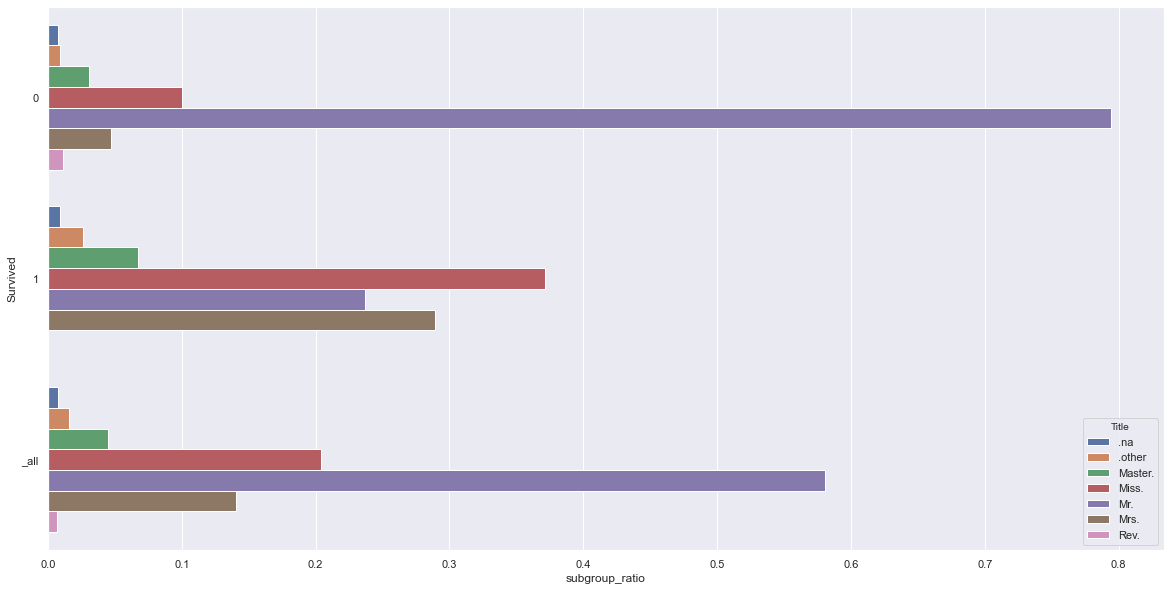

In [40]:
avc.get_plot(normalize=True) # normalize=True is also the default value

**Forgot what parameter values you are using?**

In [42]:
print(avc)

Settings:
              column: Title,
              groupby_col: Survived
              dropna: False
              max_groups: None
              min_group_ratio: 0
              min_group_count: 1
              max_subgroups: None
              min_subgroup_ratio: 0
              min_subgroup_count: 5
              min_subgroup_ratio_vs_total: 0
              round_ratio: None
              

              AdvancedValueCounts DataFrame:
                                subgroup_ratio  count  r_vs_total
Survived Title                                     
0        Master.        0.030965     17    0.019080
         Miss.          0.100182     55    0.061728
         Mr.            0.794171    436    0.489338
         Mrs.           0.047359     26    0.029181
         Rev.           0.010929      6    0.006734
         _na            0.007286      4    0.004489
         _other         0.009107      5    0.005612
         _total         1.000000    549    0.616162
1        Master.      